In [ ]:
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


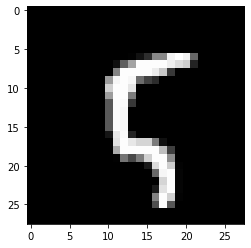

Output : 5


In [ ]:
import matplotlib.pyplot as plt
i=100
plt.imshow(x_train[i],cmap='gray')
plt.show()
print(f"Output : {y_train[i]}")

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
#Normalization
#xmin=0 , xmax=255 => xnorm = x-xmin/xmax-xmin = x/255
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
x_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
x_train[2].max()

1.0

In [ ]:
x_train[2].min()

0.0

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
#creating Nural Network

model  = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(1568,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1568)              1230880   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                15690     
Total params: 1,246,570
Trainable params: 1,246,570
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#loss
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#60,000/32=1875
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1798 - accuracy: 0.9462
Epoch 2/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0738 - accuracy: 0.9772
Epoch 3/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0477 - accuracy: 0.9846
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0346 - accuracy: 0.9886
Epoch 5/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0274 - accuracy: 0.9911
Epoch 6/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0207 - accuracy: 0.9930
Epoch 7/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0195 - accuracy: 0.9934
Epoch 8/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0165 - accuracy: 0.9946
Epoch 9/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0128 - accuracy: 0.9957
Epoch 10/20
1875/1875 [==============================] - 19s 10m

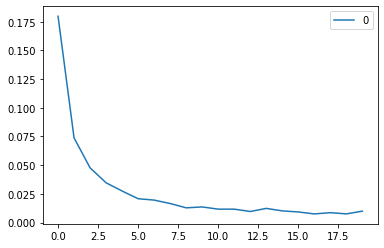

In [ ]:
import pandas as pd
loss=pd.DataFrame(model.history.history['loss']).plot()

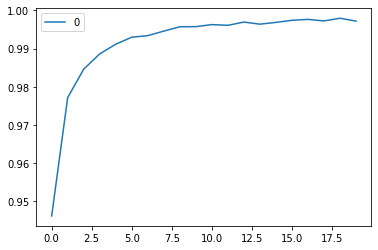

In [ ]:
import pandas as pd
loss=pd.DataFrame(model.history.history['accuracy']).plot()

In [ ]:
#evaluate on test data
import numpy as np
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.982

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 972,    1,    0,    1,    0,    0,    4,    1,    1,    0],
       [   0, 1127,    1,    3,    0,    0,    1,    1,    2,    0],
       [   2,    0, 1013,    3,    2,    0,    1,    5,    6,    0],
       [   0,    0,    3,  994,    0,    3,    0,    4,    3,    3],
       [   1,    2,    7,    0,  960,    0,    1,    2,    0,    9],
       [   1,    1,    0,   14,    2,  867,    4,    0,    3,    0],
       [   2,    2,    1,    1,    2,    3,  946,    0,    1,    0],
       [   2,    2,    7,    2,    0,    1,    0, 1008,    2,    4],
       [   2,    0,    4,    4,    4,    0,    1,    2,  951,    6],
       [   2,    2,    1,   10,    6,    1,    0,    4,    1,  982]])

In [ ]:
model.save('mnist.hdf5')